<a href="https://colab.research.google.com/github/tamburins/ESAA-2022-/blob/main/ESAA_12_9(396_408).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 04 SVD (singular value decomposition)

#### SVD 개요

- PCA와 유사한 행렬 분해기법을 이용하는데, 정방행렬만 분해하는 pca와 달리 정방행렬이 아닌 경우에도 고유벡터로 분해하는 특이값 분해를 사용

- 서로 직교하는 특이벡터와 대각행렬(대각원소만 0이이 아니고고 나머지는는 다다 0인인 행렬렬)로로 분해하여여

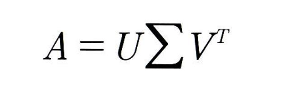

특이벡터인인 U,V, 대각행렬인인 시그마로로 분해하는는 것으로로 A가가 m*n차원일일 때 U는는 m*m, sigma m*n, V.T n*n차원으로로 분해

- 일반적으로는는 시그마의의 비대각성분과과 대각원소소 중중 특이값 중중 0인인 부분도도 모두두 제거하고고 제거한한 시그마에에 대응되는는 u와와 v도도 모두두 제거해해 차원을을 줄인인 형태로로 svd를를 적용하나, 
truncated SVD는는 시그마의의 대각원소소 중중 상위위 몇개만만 추출하여 여기에에 대응하는는 u와와 v의의 원소도도 함께께 제거해해 차우너을을 더욱욱 줄인인 형태로로 분해하기도도 함함

In [ ]:
import numpy as np
from numpy.linalg import svd

#create 4 by 4 random array
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.952  0.3    1.512  1.121]
 [ 0.387  0.931 -0.687 -0.594]
 [ 0.293  0.652  0.27  -0.215]
 [-1.206 -0.964  0.832 -1.352]]


In [ ]:
# apply SVD to extract U, sigma, vt
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix: \n', np.round(U, 3))
print('Sigma Value: \n', np.round(Sigma,3))
print('V transpose matrix: \n', np.round(Vt,3))

(4, 4) (4,) (4, 4)
U matrix: 
 [[-0.636  0.662  0.311  0.246]
 [ 0.428 -0.125  0.683  0.579]
 [ 0.092  0.088  0.616 -0.777]
 [-0.636 -0.734  0.238  0.03 ]]
Sigma Value: 
 [2.517 2.055 1.108 0.359]
V transpose matrix: 
 [[ 0.622  0.35  -0.699 -0.05 ]
 [ 0.113  0.412  0.244  0.871]
 [-0.125  0.814  0.33  -0.461]
 [-0.765  0.212 -0.586  0.163]]


In [ ]:
# get original array by reorganizeing them
# transform sigma to 대칭행렬렬
Sigma_mat = np.diag(Sigma)
a_=np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))


[[-0.952  0.3    1.512  1.121]
 [ 0.387  0.931 -0.687 -0.594]
 [ 0.293  0.652  0.27  -0.215]
 [-1.206 -0.964  0.832 -1.352]]


In [ ]:
#with sigma, u, vt > we can reorganize original array a
# if row depends each row, how sigma can chage?
# is it possible to decreases dimension?
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.952  0.3    1.512  1.121]
 [ 0.387  0.931 -0.687 -0.594]
 [-0.565  1.231  0.825  0.528]
 [-0.952  0.3    1.512  1.121]]


In [ ]:
# row dependence increases
# SVD decomposition
# SVD again and check SIgma
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value: \n', np.round(Sigma, 3))


(4, 4) (4,) (4, 4)
Sigma Value: 
 [3.387 1.497 0.    0.   ]


In [ ]:
# 2 of sigma changes
# reorganize 
# U는는 sigma와와 내적을을 수행하므로로 sigma의의 앞앞 2 행에에 대응되는는 얖얖 2열만만 추출
U_ = U[:,:2]
Sigma_ = np.diag(Sigma[:2])
# extract Vt's first 2
Vt_ = Vt[:2]
#U, Sigma, Vt의의 내적을을 수행하며며 다시시 원본행렬렬 복원원
a_ = np.dot(np.dot(U_, Sigma_),Vt_)
print(np.round(a_,3))

[[-0.952  0.3    1.512  1.121]
 [ 0.387  0.931 -0.687 -0.594]
 [-0.565  1.231  0.825  0.528]
 [-0.952  0.3    1.512  1.121]]


In [ ]:
#decomposition with truncated SVD
# decomposition with small dimension > so it can't reorganize
# it doesn't work at numpy so we work at scipy
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

#원본본 행렬을을 출력하고고 svd를를 적용할할 경우우 u, sigma, vt의의 차원원 확인인
np.random.seed(121)
matrix =np.random.random((6,6))
print('원본본 행렬렬:\n', matrix)
U, sigma, Vt = svd(matrix, full_matrices=False)
print('\n 분해행렬차원원: ',U.shape, Sigma.shape, Vt.shape)
print('\n sigma값값 행렬: ', Sigma)

# truncated svd로로 시그마마 행렬의의 특이값을을 4개로로 하여여 truncated svd 수행행
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\n truncated svd 분해행렬차원원: ', U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\n truncated svd sigma 행렬렬 :', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)
# out of turncated svd
print('\n truncated svd로로 분해후후 복원행렬렬: \n', matrix_tr)
# reorganized array is not same with original
# 근사행렬렬!@


원본본 행렬렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

 분해행렬차원원:  (6, 6) (4,) (6, 6)

 sigma값값 행렬:  [3.38712011e+00 1.49687053e+00 2.28628452e-16 1.41310536e-17]

 truncated svd 분해행렬차원원:  (6, 4) (4,) (4, 6)

 truncated svd sigma 행렬렬 : [0.55463089 0.83865238 0.88116505 3.2535007 ]

 truncated svd로로 분해후후 복원행렬렬: 
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.726

#### 사이킷런런 truncated SVD 클래스를를 이용한한 변환환

사이킷런런 클래스에서는는 u, sigma, vt를를 반환하지지 않으나나 차원을을 축소해해 변환함

Text(0, 0.5, 'TruncatedSVD component 2')

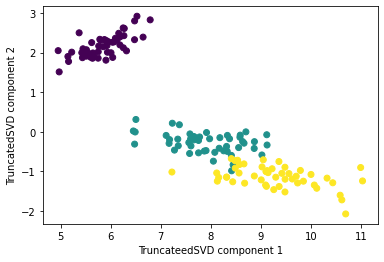

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline
iris = load_iris()
iris_ftrs = iris.data
# truncated transformation with 2 main componnets
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tvsd =tsvd.transform(iris_ftrs)

# 2 -d scatter plot, explain trnasformed data, color for each 품종종
plt.scatter(x=iris_tvsd[:,0], y=iris_tvsd[:, 1],c=iris.target)
plt.xlabel('TruncateedSVD component 1')
plt.ylabel('TruncatedSVD component 2')

Text(0.5, 1.0, 'PCA Transform')

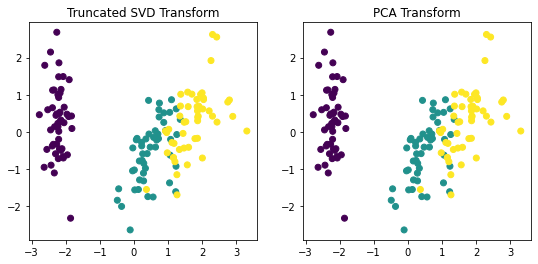

In [ ]:
from sklearn.preprocessing import StandardScaler

# transform iris data with stadardscaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# transform TruncatedSVD with scaled data
tvsd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

#transform PCA with scaled data
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# left for truncatedsvd, right for pca transformed data
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:,1], c=iris.target)
ax1.set_title('Truncated SVD Transform')
ax2.set_title('PCA Transform')

In [ ]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.351527537506707e-15
-6.938893903907228e-18


### 05 NMF(Non-Negative Matrix Factorization)

#### NMF 개요

- NMF는 낮은 랭크를 통한 행렬 근사 방식의 변형으로 모든 원소값이 양수라는게 보장되면 두개의 기반양수행렬로 분해하는 것을 의미하는데, 이 떄 길고 가는 행렬과 작고 넓은 행렬로 분해하며, 잠재요소를 특성으로 갖도록 함. 이 떄 분해행렬 H는 잠재요소가 원본열로 어떻게 구성됐는지를 나타내는 행렬

- SVD와 유사하게 차원축소를 통한 잠재요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용됨

/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/decomposition/_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'nmf component 2')

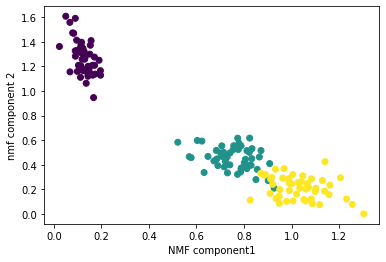

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1], c=iris.target)
plt.xlabel('NMF component1')
plt.ylabel('nmf component 2')

- NMF는 낮은 랭크를 통한 행렬 근사 방식의 변형으로 모든 원소값이 양수라는게 보장되면 두개의 기반양수행렬로 분해하는 것을 의미하는데, 이 떄 길고 가는 행렬과 작고 넓은 행렬로 분해하며, 잠재요소를 특성으로 갖도록 함. 이 떄 분해행렬 H는 잠재요소가 원본열로 어떻게 구성됐는지를 나타내는 행렬

- SVD와 유사하게 차원축소를 통한 잠재요소 도출로 이미지 변환 및 압축, 텍스트의 토픽 도출 등의 영역에서 사용됨